In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ANN/wine_data.csv')
df = df.iloc[:,1:]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [10]:
df.median()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
dtype: float64

In [11]:
df.std()

fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64

In [12]:
df.min()

fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64

In [13]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.61100
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   9.00000
dtype: float64

In [14]:
dict(df.max())

{'fixed acidity': 15.9,
 'volatile acidity': 1.58,
 'citric acid': 1.66,
 'residual sugar': 65.8,
 'chlorides': 0.611,
 'free sulfur dioxide': 289.0,
 'total sulfur dioxide': 440.0,
 'density': 1.03898,
 'pH': 4.01,
 'sulphates': 2.0,
 'alcohol': 14.9,
 'quality': 9.0}

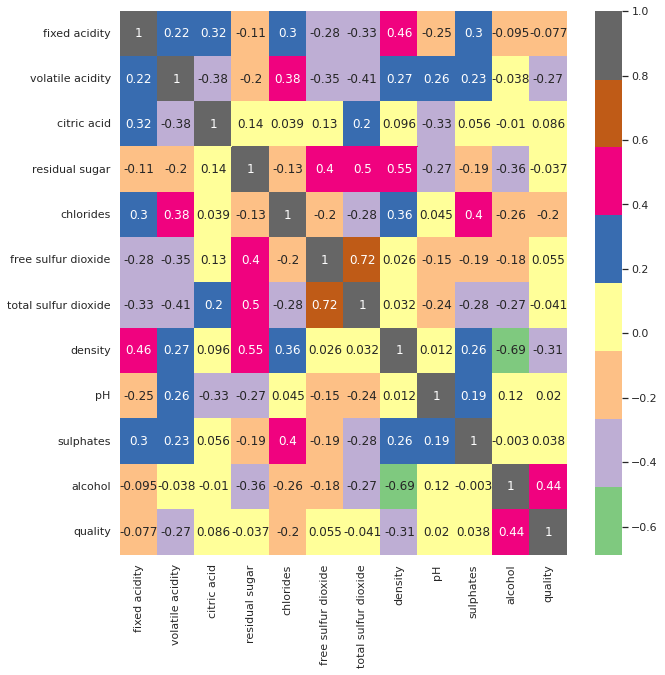

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent)

In [16]:

x = df.drop(labels=['quality'] , axis=1)
y = df['quality']

In [17]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y , random_state=0,test_size=0.2)

In [51]:
x_train.shape

(5197, 11)

In [52]:
x_test.shape

(1300, 11)

In [22]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0


In [23]:
y_train.shape

(5197,)

In [24]:
y_test.shape

(1300,)

In [25]:
y_test.head()

5316    6
5210    6
3518    6
1622    5
2443    8
Name: quality, dtype: int64

In [29]:
model = tf.keras.models.Sequential()

In [32]:
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:

model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu' ,input_dim=x_train.shape[1]))
model.add(Dense(units=25,kernel_initializer='he_uniform',activation='relu' ))
model.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu' ))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu' ))
model.add(Dense(units=1,kernel_initializer='he_uniform',activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])



In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dense_2 (Dense)             (None, 20)                520       
                                                                 
 dense_3 (Dense)             (None, 15)                315       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.layers

In [38]:
x_train = x_train.values
x_train

array([[ 5.  ,  0.61,  0.12, ...,  3.26,  0.37, 13.5 ],
       [ 6.8 ,  0.28,  0.4 , ...,  2.93,  0.5 ,  8.7 ],
       [ 5.7 ,  0.22,  0.2 , ...,  3.22,  0.46,  8.9 ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  3.05,  0.38,  9.1 ],
       [ 6.6 ,  0.22,  0.37, ...,  3.37,  0.55, 10.3 ],
       [ 8.7 ,  0.22,  0.42, ...,  2.99,  0.43, 10.  ]])

In [41]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0
...,...,...,...,...,...,...,...,...,...,...,...
5710,5.5,0.21,0.25,1.2,0.040,18.0,75.0,0.99006,3.31,0.56,11.3
6475,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.6
1433,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1
2707,6.1,0.29,0.27,1.7,0.024,13.0,76.0,0.98930,3.21,0.51,12.6


In [40]:
x_test.shape

(1300, 11)

In [54]:

x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0
...,...,...,...,...,...,...,...,...,...,...,...
5710,5.5,0.21,0.25,1.2,0.040,18.0,75.0,0.99006,3.31,0.56,11.3
6475,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.6
1433,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1
2707,6.1,0.29,0.27,1.7,0.024,13.0,76.0,0.98930,3.21,0.51,12.6


In [55]:
x_test.shape

(1300, 11)

In [44]:
y_test

5316    6
5210    6
3518    6
1622    5
2443    8
       ..
5710    6
6475    7
1433    7
2707    7
2887    7
Name: quality, Length: 1300, dtype: int64

In [45]:
y_train

5372    5
1790    5
5879    6
1065    6
852     5
       ..
4931    7
3264    8
1653    6
2607    7
2732    5
Name: quality, Length: 5197, dtype: int64

In [47]:

y_train.ndim


1

In [56]:
history = model.fit(x_train,y_train , validation_split=0.33,batch_size=10,epochs=30)

Epoch 1/30
349/349 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/30
349/349 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/30
349/349 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/30
349/349 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/30
349/349 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/30
349/349 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/30
349/349 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,NaN,0.0,NaN,0.0
1,NaN,0.0,NaN,0.0
2,NaN,0.0,NaN,0.0
3,NaN,0.0,NaN,0.0
4,NaN,0.0,NaN,0.0
5,NaN,0.0,NaN,0.0
6,NaN,0.0,NaN,0.0
7,NaN,0.0,NaN,0.0
8,NaN,0.0,NaN,0.0
9,NaN,0.0,NaN,0.0
